<a href="https://colab.research.google.com/github/rakshith3101/deep-learning/blob/main/movie_recomendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NATURAL LANGUAGE PROCESSING**

This project is based on nlp which is the subset or the one particular applications of deep learning. Natural language processing is basically predicting output based on english text or english language based data.Hey 

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! kaggle datasets download akshaypawar7/millions-of-movies

 87% 146M/168M [00:00<00:00, 172MB/s]
100% 168M/168M [00:01<00:00, 166MB/s]


In [ ]:
! unzip millions-of-movies.zip -d millions-of-movies

Archive:  millions-of-movies.zip
  inflating: millions-of-movies/movies.csv  


In [ ]:
import tensorflow as tf
import pandas as pd


In [ ]:
df=pd.read_csv("/content/millions-of-movies/movies.csv")

In [ ]:
df.head()
df.shape

(740830, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740830 entries, 0 to 740829
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    740830 non-null  int64  
 1   title                 740826 non-null  object 
 2   genres                521322 non-null  object 
 3   original_language     740830 non-null  object 
 4   overview              620415 non-null  object 
 5   popularity            740830 non-null  float64
 6   production_companies  343723 non-null  object 
 7   release_date          684959 non-null  object 
 8   budget                740830 non-null  float64
 9   revenue               740830 non-null  float64
 10  runtime               702939 non-null  float64
 11  status                740830 non-null  object 
 12  tagline               109555 non-null  object 
 13  vote_average          740830 non-null  float64
 14  vote_count            740830 non-null  float64
 15  

In [ ]:

df.isnull().sum()

id                           0
title                        4
genres                  219508
original_language            0
overview                120415
popularity                   0
production_companies    397107
release_date             55871
budget                       0
revenue                      0
runtime                  37891
status                       0
tagline                 631275
vote_average                 0
vote_count                   0
credits                 230444
keywords                526882
poster_path             197175
backdrop_path           516340
recommendations         699799
dtype: int64

In [ ]:
df.duplicated().sum()

124

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df[['title','release_date']].duplicated().sum()

80729

In [ ]:
df.drop_duplicates(subset=['title','release_date'],inplace=True)

In [ ]:
df_=df[df.vote_count>=20].reset_index()

In [ ]:
df_.fillna('',inplace=True)

In [ ]:
selected=df_[(df_['genres']=='') & (df_['overview']=='')].index
selected.shape

(35,)

In [ ]:
df_.drop(selected,inplace=True)


In [ ]:
df_

In [ ]:
df_['genres']=df_['genres'].apply(lambda x:' '.join(x.split('-')))
df_['keywords']=df_['keywords'].apply(lambda x:' '.join(x.split('-')))
df_['credits']=df_['credits'].apply(lambda x:' '.join(x.replace(' ','').split('-')[:5]))

In [ ]:
df_['tag']=df_['overview']+' '+df_['genres']+' '+df_['keywords']+' '+df_['credits']+' '+df_['original_language']

In [ ]:
df_.tag[1]

'Nearly 5000 years after he was bestowed with the almighty powers of the Egyptian gods—and imprisoned just as quickly—Black Adam is freed from his earthly tomb ready to unleash his unique form of justice on the modern world. Action Adventure Fantasy anti hero superhero based on comic dc extended universe DwayneJohnson AldisHodge PierceBrosnan NoahCentineo SarahShahi en'

In [ ]:
df_['tag']=df_['tag'].str.replace('[^\w\s]','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


**checkpoint**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
#from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [ ]:
tfidf=TfidfVectorizer(stop_words='english')

In [ ]:
tfidf_vector=tfidf.fit_transform(df_['tag'])

In [ ]:
print(tfidf_vector)

  (0, 42343)	0.026253888017406943
  (0, 22823)	0.19545134188671853
  (0, 121362)	0.18823746931147434
  (0, 41499)	0.19545134188671853
  (0, 33523)	0.18823746931147434
  (0, 79404)	0.19545134188671853
  (0, 144854)	0.09893280707178265
  (0, 54220)	0.12938095715451453
  (0, 39352)	0.09728703295094071
  (0, 76009)	0.15550575288395377
  (0, 128133)	0.10330917404897566
  (0, 53787)	0.10549264453028576
  (0, 124657)	0.08748434780873213
  (0, 115959)	0.13493860226025564
  (0, 137383)	0.04697445883216511
  (0, 59952)	0.05237602336359278
  (0, 63109)	0.12145816215621524
  (0, 44432)	0.16101079369157953
  (0, 10858)	0.0910271653276688
  (0, 98698)	0.1027177090926125
  (0, 140555)	0.07323134708664439
  (0, 141838)	0.14128441980387024
  (0, 5619)	0.10209839412652018
  (0, 130883)	0.09905076285572915
  (0, 46854)	0.07811401737134943
  :	:
  (43421, 59471)	0.14230649544074522
  (43421, 111034)	0.13974983950533887
  (43421, 61489)	0.11416769074675955
  (43421, 128955)	0.1301900491365804
  (43421, 987

In [ ]:
df_.tag[0]

'After being resurrected by a sinister entity Art the Clown returns to Miles County where he must hunt down and destroy a teenage girl and her younger brother on Halloween night  As the body count rises the siblings fight to stay alive while uncovering the true nature of Arts evil intent Horror Thriller clown halloween resurrection sequel gore slasher killer killer clown duringcreditsstinger evil clown halloween night graphic violence LaurenLaVera DavidHowardThornton ElliottFullam SamanthaScaffidi CaseyHartnett en'

In [ ]:
from skimage import io

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
df_

In [ ]:
def recom(title):
    id=df_.index[df_['title']==title][0]
    try:
        img=io.imread(f'https://image.tmdb.org/t/p/w500/{df_.loc[id,"poster_path"]}')
        plt.imshow(img)
        plt.axis('off')
        plt.title(title)
        plt.show()
    except:pass

    print("RECOMENDATIONS")
    rnd=list(enumerate(cosine_similarity(tfidf_vector,tfidf_vector[id])))
    rnd=sorted(rnd,key=lambda x:x[1],reverse=True)
    rnd=rnd[1:13]
    movie_indices=[i[0] for i in rnd]
    result=df_.iloc[movie_indices]

    fig,ax=plt.subplots(4,3,figsize=(8,8))
    ax=ax.flatten()
    for i,j in enumerate(result.poster_path):

        try:
            ax[i].axis('off')
            ax[i].set_title(result.iloc[i].title,)
            
            img=io.imread(f'https://image.tmdb.org/t/p/w500/{j}')
            ax[i].imshow(img)
        except:pass
        #ax[i].text(size=12,ha='centre',text='hey')
    fig.tight_layout()
    fig.show()



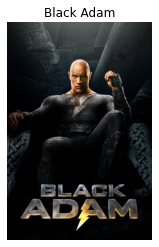

RECOMENDATIONS


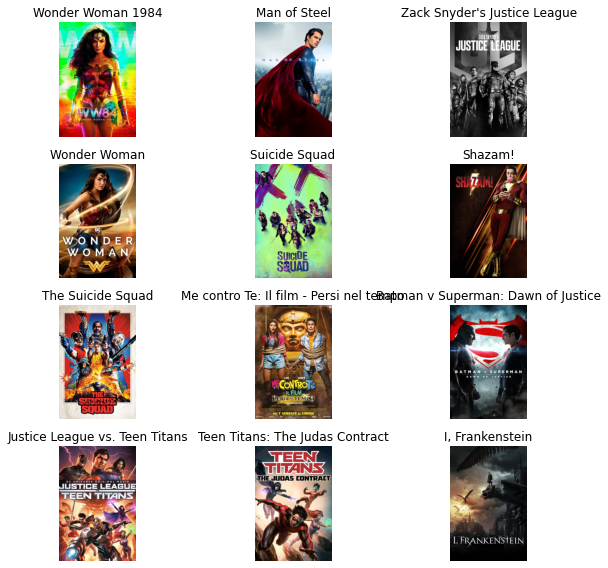

In [ ]:
recom("Black Adam")